In [ ]:
import glob
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

IMGS_DIR = "images"

In [2]:
image_paths = glob.glob(f"{IMGS_DIR}/*.png")

print(f"Всего файлов: {len(image_paths)}")

Всего файлов: 867


In [5]:
rows = []

for filepath in image_paths:
    filename = filepath.split("/")[-1]
    with Image.open(filepath) as img:
        width, height = img.size
    with open(filepath, "rb") as f:
        f.seek(0, 2)
        size_bytes = f.tell()

    row = {
        "filename": filename,
        "width": width,
        "height": height,
        "aspect_ratio": float(width) / float(height),
        "pixels": width * height,
        "size_bytes": size_bytes,
    }
    rows.append(row)

df = pd.DataFrame(rows)
df.head(10)

,filename,width,height,aspect_ratio,pixels,size_bytes
0,01.png,1001,1119,0.894549,1120119,607399
1,02.png,939,985,0.953299,924915,611612
2,03.png,809,1116,0.724910,902844,663789
3,04.png,931,1085,0.858065,1010135,638219
4,05.png,1432,1400,1.022857,2004800,955119
5,6.png,770,883,0.872027,679910,684366
6,06.png,1358,1224,1.109477,1662192,733155
7,07.png,1408,1373,1.025492,1933184,1142295
8,08.png,1437,1397,1.028633,2007489,938018
9,09.png,1448,1417,1.021877,2051816,1099503


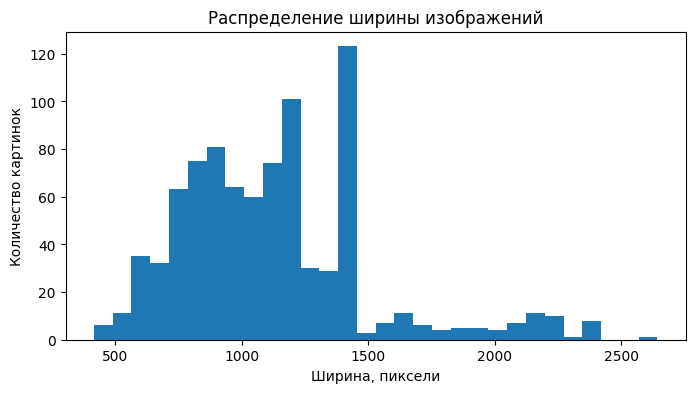

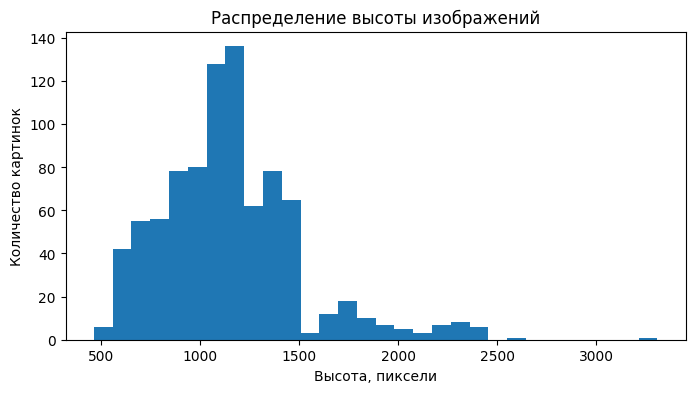

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(df["width"], bins=30)
plt.xlabel("Ширина, пиксели")
plt.ylabel("Количество картинок")
plt.title("Распределение ширины изображений")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df["height"], bins=30)
plt.xlabel("Высота, пиксели")
plt.ylabel("Количество картинок")
plt.title("Распределение высоты изображений")
plt.show()

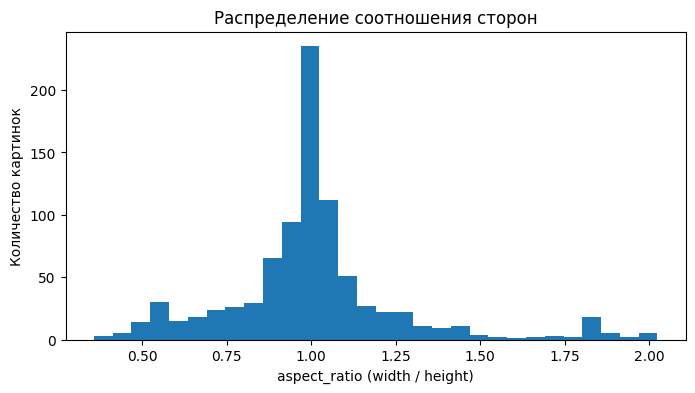

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(df["aspect_ratio"], bins=30)
plt.xlabel("aspect_ratio (width / height)")
plt.ylabel("Количество картинок")
plt.title("Распределение соотношения сторон")
plt.show()

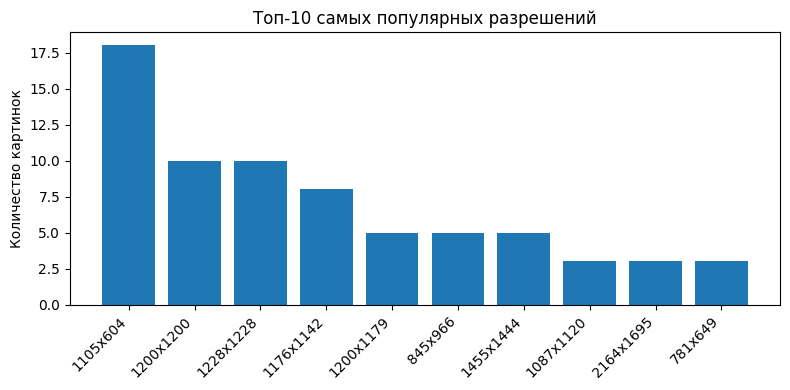

In [8]:
df["resolution_str"] = df["width"].astype(str) + "x" + df["height"].astype(str)
top_res = df["resolution_str"].value_counts().head(10)

plt.figure(figsize=(8, 4))
plt.bar(top_res.index, top_res.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Количество картинок")
plt.title("Топ-10 самых популярных разрешений")
plt.tight_layout()
plt.show()